In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import re

In [3]:
tem = pd.read_excel(r'S:\assignments_excelr\Textmining/Elon_musk.xlsx')

In [4]:
tem.head()


,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:


tem['Text'] = tem['Text'].astype(str) 
tem['Text'] = tem['Text'].apply(lambda x: re.sub('[^a-zA-Z ]', '', x))


In [6]:
tem.head()

,Unnamed: 0,Text
0,1,kunalb Im an alien
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,3,joerogan Spotify Great interview
3,4,gtera Doge is underestimated
4,5,teslacn Congratulations Tesla China for amazin...


In [7]:
tem['Text']= tem['Text'].apply(lambda x:x.lower())

In [8]:
tem.head(3)

,Unnamed: 0,Text
0,1,kunalb im an alien
1,2,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,joerogan spotify great interview


In [9]:
import nltk


In [10]:
#f_words = tem.apply(lambda col: col.str.split(), axis=1)

In [11]:
tem.columns

Index(['Unnamed: 0', 'Text'], dtype='object')

In [12]:
del tem['Unnamed: 0']

In [13]:
tem.head()

,Text
0,kunalb im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazin...


In [14]:
all_words = tem.apply(lambda col: ' '.join(col.astype(str)).split()).values.flatten()

In [15]:
all_words

array(['kunalb', 'im', 'an', ..., 'progress', 'update', 'august'],
      dtype=object)

In [16]:
import nltk

In [17]:
freq  = nltk.FreqDist(all_words)

In [19]:
my_words= all_words

In [38]:

with open(r'S:\assignments_excelr\Textmining/stop.txt', 'r') as file:
            stop_words = file.read().splitlines()
print(stop_words)


['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

In [21]:
filtered_words = [x for x in my_words if x not in stop_words]

In [22]:
filtered_words

['kunalb',
 'im',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera',
 'doge',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'year',
 'happy',
 'year',
 'ox',
 'httpstcowfkmyuoj',
 'frodo',
 'underdogeall',
 'thought',
 'failhimself',
 'httpstcozgxjfdzzrm',
 'owensparks',
 'flcnhvy',
 'anonyx',
 'haha',
 'flcnhvy',
 'anonyx',
 'tweets',
 'represent',
 'realworld',
 'time',
 'allocation',
 'entertaining',
 'outcome',
 'givedirectly',
 'agree',
 'clubhouse',
 'kanyewest',
 'httpstcorweuhsts',
 'geoffkeighley',
 'unrealengine',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'toddler',
 'hodler',
 'joshmanmode',
 'issues',
 'sentencing',
 'bit',
 'high',
 'freewalletorg',
 'fixing',
 'freewalletorg',
 'unlock',
 'account',
 'astrojordy',
 'ufuf',
 'true',
 'power',
 'haha',
 'httpstcofcuhqsdo',
 'freewalletorg',
 'crypto',
 'wallet',
 'wont',
 'give',
 'pr

In [23]:
freq  = nltk.FreqDist(filtered_words)

In [24]:
most_common= freq.most_common(10)

In [29]:
most_common

[('spacex', 239),
 ('amp', 218),
 ('tesla', 166),
 ('erdayastronaut', 142),
 ('rt', 127),
 ('ppathole', 123),
 ('flcnhvy', 114),
 ('great', 75),
 ('teslaownerssv', 73),
 ('wholemarsblog', 68)]

In [30]:
words, frequencies = zip(*most_common)

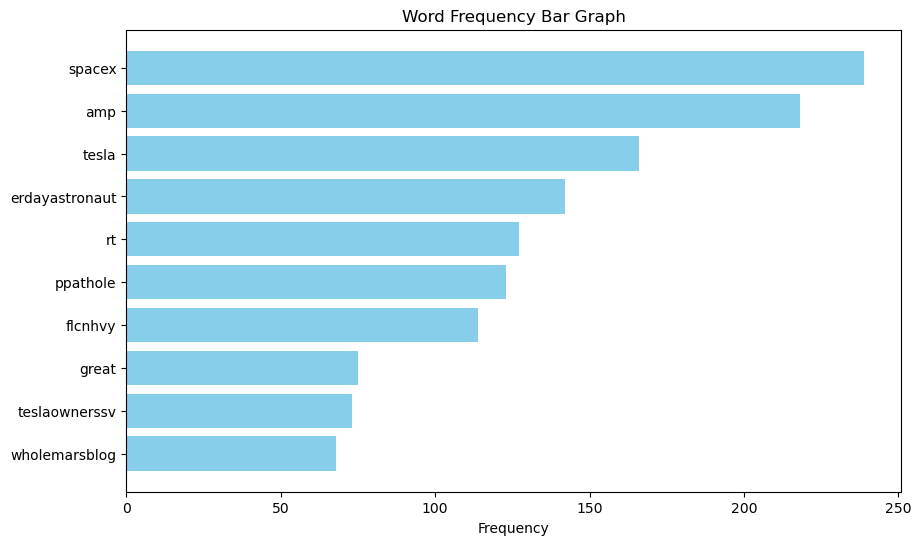

In [33]:
plt.figure(figsize=(10, 6))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('Word Frequency Bar Graph')
plt.gca().invert_yaxis()
plt.show()

In [26]:
from wordcloud import WordCloud


In [27]:
cloud = WordCloud()

In [34]:
text = ' '.join(filtered_words)


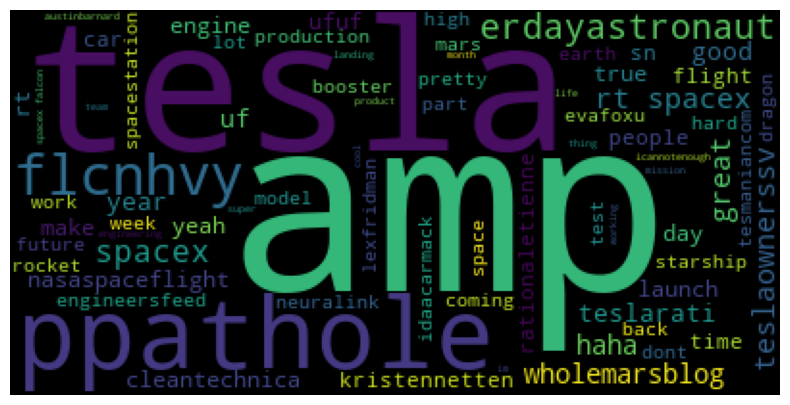

In [36]:
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()